<a href="https://colab.research.google.com/github/somesh1237/Research-Projects/blob/main/Diabetes_prediction_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes prediction

Age: Age is an important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases. This is partly due to factors such as reduced physical activity, changes in hormone levels, and a higher likelihood of developing other health conditions that can contribute to diabetes.

Gender: Gender can play a role in diabetes risk, although the effect may vary. For example, women with a history of gestational diabetes (diabetes during pregnancy) have a higher risk of developing type 2 diabetes later in life. Additionally, some studies have suggested that men may have a slightly higher risk of diabetes compared to women.

Body Mass Index (BMI): BMI is a measure of body fat based on a person's height and weight. It is commonly used as an indicator of overall weight status and can be helpful in predicting diabetes risk. Higher BMI is associated with a greater likelihood of developing type 2 diabetes. Excess body fat, particularly around the waist, can lead to insulin resistance and impair the body's ability to regulate blood sugar levels.

Hypertension: Hypertension, or high blood pressure, is a condition that often coexists with diabetes. The two conditions share common risk factors and can contribute to each other's development. Having hypertension increases the risk of developing type 2 diabetes and vice versa. Both conditions can have detrimental effects on cardiovascular health.

Heart Disease: Heart disease, including conditions such as coronary artery disease and heart failure, is associated with an increased risk of diabetes. The relationship between heart disease and diabetes is bidirectional, meaning that having one condition increases the risk of developing the other. This is because they share many common risk factors, such as obesity, high blood pressure, and high cholesterol.

Smoking History: Smoking is a modifiable risk factor for diabetes. Cigarette smoking has been found to increase the risk of developing type 2 diabetes. Smoking can contribute to insulin resistance and impair glucose metabolism. Quitting smoking can significantly reduce the risk of developing diabetes and its complications.

HbA1c Level: HbA1c (glycated hemoglobin) is a measure of the average blood glucose level over the past 2-3 months. It provides information about long-term blood sugar control. Higher HbA1c levels indicate poorer glycemic control and are associated with an increased risk of developing diabetes and its complications.

Blood Glucose Level: Blood glucose level refers to the amount of glucose (sugar) present in the blood at a given time. Elevated blood glucose levels, particularly in the fasting state or after consuming carbohydrates, can indicate impaired glucose regulation and increase the risk of developing diabetes. Regular monitoring of blood glucose levels is important in the diagnosis and management of diabetes.

Diabetes has become such a common disease in today's era that almost 10.5% of adult world population has diabetes. Lack of physical activities and urbanisation have been attributed to be the main causes of diabetes. Creating models that can help predict if a person has diabetes or not can be very helpful for early diagnosis and prevention of this disease.


## Importing the dependencies

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Loading the dataset

df = pd.read_csv('/content/diabetes_prediction_dataset (1).csv')

## Preprocessing the data

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(96146, 9)

The data was checked for duplicate values and those values were dropped resulting in the new shape of the data.

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df['diabetes'].value_counts()

,count
diabetes,
0,87664
1,8482


There are no null values in the data set.
The distribution of the values in the target column shows that the dataset is significantly imbalanced which will be taken care of during feature engineering.

## Exploratory Data Analysis

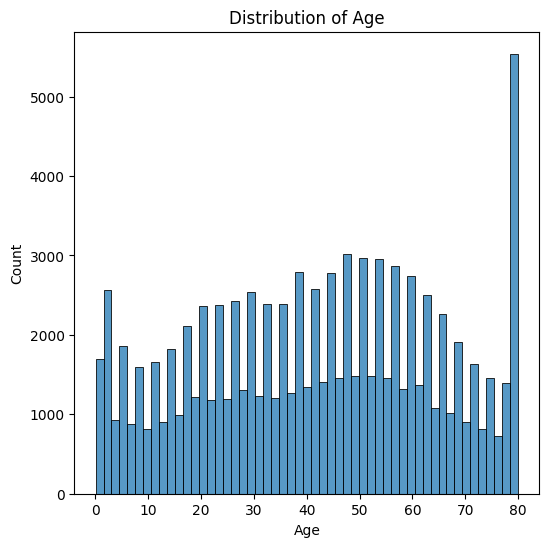

In [ ]:
plt.figure(figsize=(6, 6))
sns.histplot(df['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

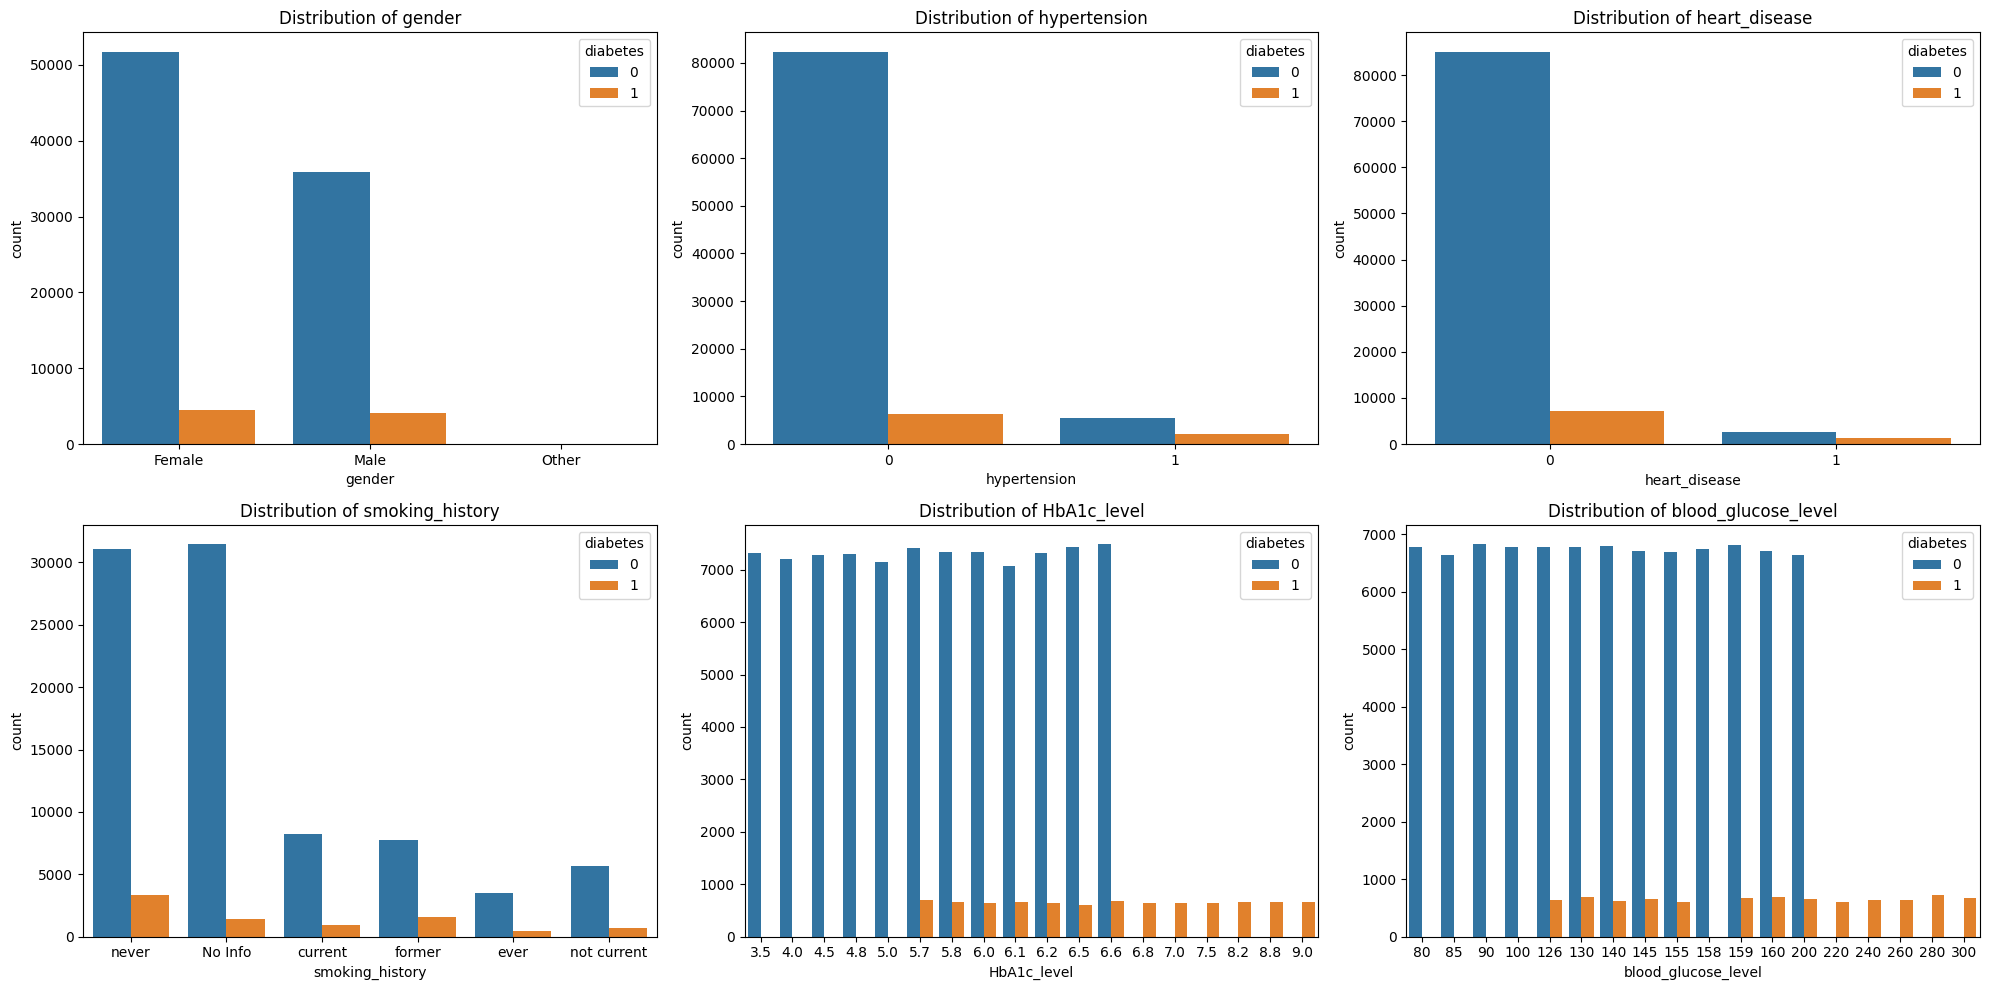

In [ ]:
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'HbA1c_level', 'blood_glucose_level']
# defining the categorical variables to create multiple plots using one code
nrows = 2    #plotting the graphs on the same page
ncols = 3

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(categorical_vars):                       #creating for loop for all the variables
    ax = axs[i]
    sns.countplot(x=var, data=df, hue='diabetes', ax=ax)
    ax.set_title(f'Distribution of {var}')

plt.tight_layout()   #prevents overlapping
plt.show()

Inferences from the analysis:
* The main dependencies can be observed in the HbA1c levels and the blood glucose levels. The higher values of these two factors can be seen corresponding to diabetes.
* It is further observed that females are at a slightly greater risk of developing diabetes as compared to males.

## Feature Engineering

In [ ]:
# converting the categorical values to numeric values
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


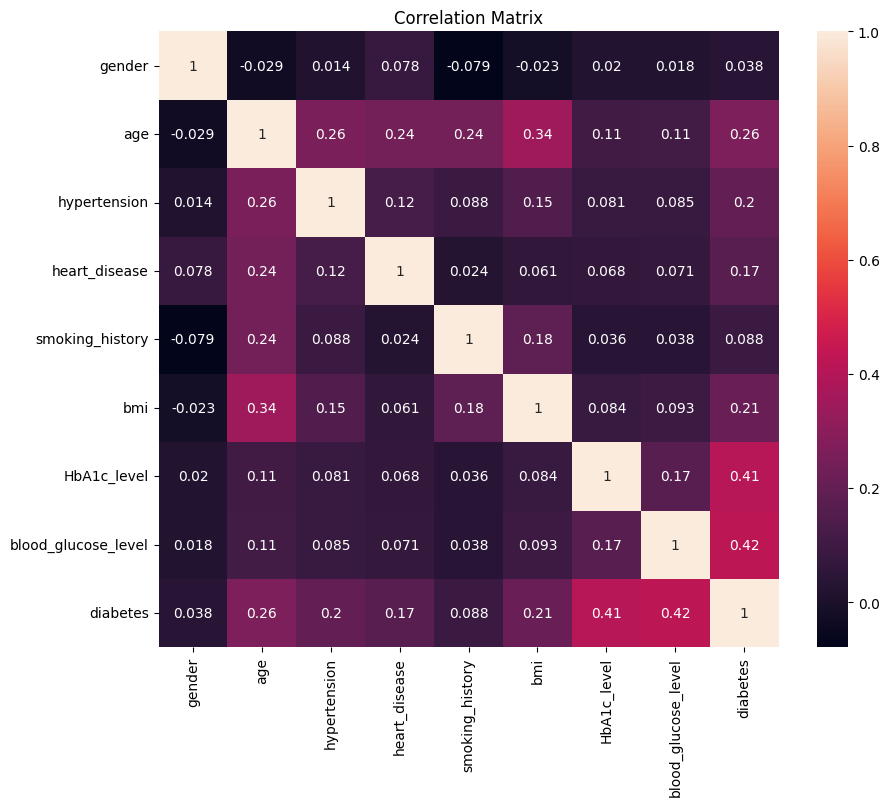

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True )
plt_title = plt.title("Correlation Matrix")

Why the Resampling Results in 87,000 for Both Classes:
Initially, your dataset was heavily imbalanced with 87,000 samples for those who do not have diabetes and 8,700 samples for those who do.
SMOTE was applied first, which increased the number of minority class samples (those with diabetes) to match the number of majority class samples (those without diabetes), bringing both to approximately 87,000.
Tomek links might then have slightly adjusted these numbers by removing borderline samples, but since the imbalance was large, the final dataset still has about 87,000 samples for both classes.
The goal of this process is to ensure that the model does not become biased toward the majority class, improving its ability to correctly predict both classes. This balanced dataset helps the model learn more effectively from both classes, especially when the minority class is underrepresented.

In [ ]:
#handling the imbalanced dataset
from imblearn.combine import SMOTETomek

X = df.drop('diabetes', axis=1)
Y = df['diabetes']

smk = SMOTETomek(random_state=42)
X_resampled, Y_resampled = smk.fit_resample(X, Y)

resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                          pd.DataFrame(Y_resampled, columns=['diabetes'])], axis=1)
resampled_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
resampled_df['diabetes'].value_counts()

,count
diabetes,
0,87269
1,87269


# **MODEL EVALUATION AND TRAINING**

In [ ]:
from sklearn.model_selection import train_test_split

# Separating the features and target variable from the resampled DataFrame
X = resampled_df.drop('diabetes', axis=1)
Y = resampled_df['diabetes']

# Splitting the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Printing the shape of the training and testing sets
print(X_train.shape)
print(X_test.shape)

(139630, 8)
(34908, 8)


In [ ]:
 !pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 8.5 MB/s eta 0:00:00


In [ ]:
# Importing essential libraries
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from time import time
import tracemalloc

# Function to measure time and memory usage and evaluate model performance
def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    # Start measuring time and memory usage
    start_time = time()
    tracemalloc.start()

    # Fit the model
    model.fit(X_train, Y_train)

    # Measure training time
    training_time = time() - start_time

    # Get peak memory usage during training
    current, peak = tracemalloc.get_traced_memory()

    # Stop measuring memory
    tracemalloc.stop()

    # Make predictions
    start_time = time()
    predictions = model.predict(X_test)
    prediction_time = time() - start_time

    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_test, predictions)
    report = classification_report(Y_test, predictions, output_dict=True)
    confusion = confusion_matrix(Y_test, predictions)

    # Print results
    print(f"Model: {model.__class__.__name__}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Prediction Time: {prediction_time:.4f} seconds")
    print(f"Peak Memory Usage: {peak / 10**6:.2f} MB")
    print("Classification Report:\n", classification_report(Y_test, predictions))
    print("Confusion Matrix:\n", confusion)
    print(f"Accuracy: {accuracy:.4f}\n")

    # Return metrics for comparison
    return {
        'model_name': model.__class__.__name__,
        'training_time': training_time,
        'prediction_time': prediction_time,
        'peak_memory': peak / 10**6,
        'accuracy': accuracy,
        'report': report,
    }

# Applying Random Forest
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train, Y_train, X_test, Y_test)

# Applying LGBMClassifier
lgbm_model = LGBMClassifier(random_state=42, force_row_wise=True)
evaluate_model(lgbm_model, X_train, Y_train, X_test, Y_test)

# Applying K-Nearest Neighbors
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, Y_train, X_test, Y_test)


Model: RandomForestClassifier
Training Time: 17.4114 seconds
Prediction Time: 0.6254 seconds
Peak Memory Usage: 17.09 MB
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17532
           1       0.97      0.97      0.97     17376

    accuracy                           0.97     34908
   macro avg       0.97      0.97      0.97     34908
weighted avg       0.97      0.97      0.97     34908

Confusion Matrix:
 [[17093   439]
 [  458 16918]]
Accuracy: 0.9743

[LightGBM] [Info] Number of positive: 69893, number of negative: 69737
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 139630, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500559 -> initscore=0.002234
[LightGBM] [Info] Start training from score 0.002234
Model: LGBMClassifier
Training Time: 1.5174 seconds
Prediction Time: 0.1641 seconds
Peak Memory Usage: 19.08 MB
Classification Repo

{'model_name': 'KNeighborsClassifier',
 'training_time': 0.30822229385375977,
 'prediction_time': 3.108616590499878,
 'peak_memory': 17.880801,
 'accuracy': 0.9374928383178641,
 'report': {'0': {'precision': 0.9828866238832263,
   'recall': 0.8910563540953684,
   'f1-score': 0.9347214743014419,
   'support': 17532.0},
  '1': {'precision': 0.899547701693489,
   'recall': 0.9843462246777164,
   'f1-score': 0.940038472107722,
   'support': 17376.0},
  'accuracy': 0.9374928383178641,
  'macro avg': {'precision': 0.9412171627883577,
   'recall': 0.9377012893865424,
   'f1-score': 0.937379973204582,
   'support': 34908.0},
  'weighted avg': {'precision': 0.9414033790118823,
   'recall': 0.9374928383178641,
   'f1-score': 0.9373680926663417,
   'support': 34908.0}}}

Model: RandomForestClassifier
Training Time: 17.7494 seconds
Prediction Time: 0.6722 seconds
Peak Memory Usage: 17.03 MB
Accuracy: 0.9743

[LightGBM] [Info] Number of positive: 69893, number of negative: 69737
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 139630, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500559 -> initscore=0.002234
[LightGBM] [Info] Start training from score 0.002234
Model: LGBMClassifier
Training Time: 1.4640 seconds
Prediction Time: 0.1605 seconds
Peak Memory Usage: 19.01 MB
Accuracy: 0.9734

Model: KNeighborsClassifier
Training Time: 0.3283 seconds
Prediction Time: 2.9609 seconds
Peak Memory Usage: 17.88 MB
Accuracy: 0.9375



<ipython-input-36-7f80af4d161c>:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='model_name', y='training_time', data=results_df, marker='o', palette="Blues_d")


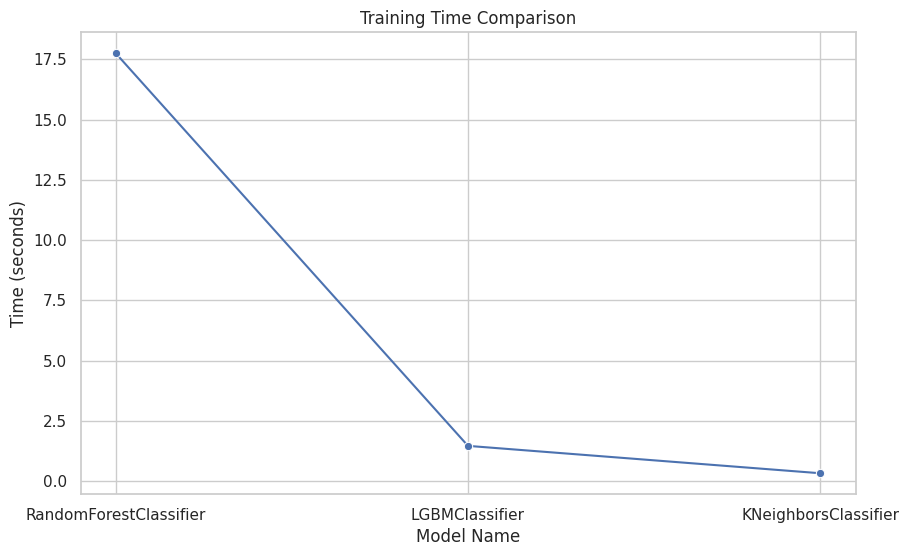

<ipython-input-36-7f80af4d161c>:37: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='model_name', y='prediction_time', data=results_df, marker='o', palette="Greens_d")


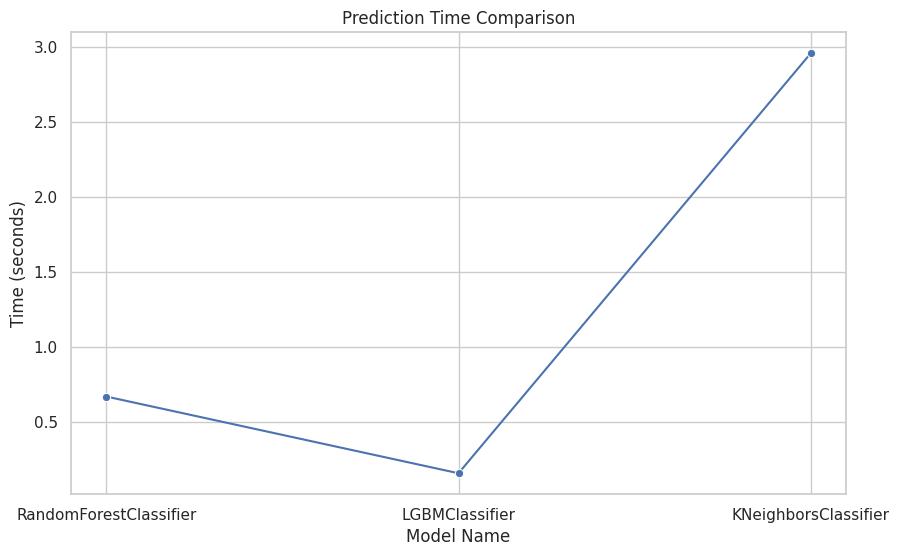

<ipython-input-36-7f80af4d161c>:45: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='model_name', y='peak_memory', data=results_df, marker='o', palette="Reds_d")


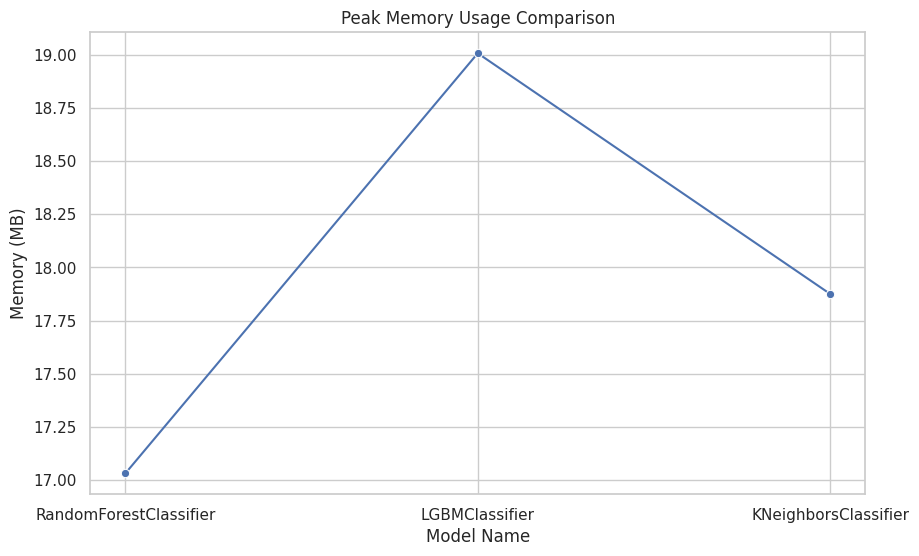

<ipython-input-36-7f80af4d161c>:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='model_name', y='accuracy', data=results_df, marker='o', palette="Purples_d")


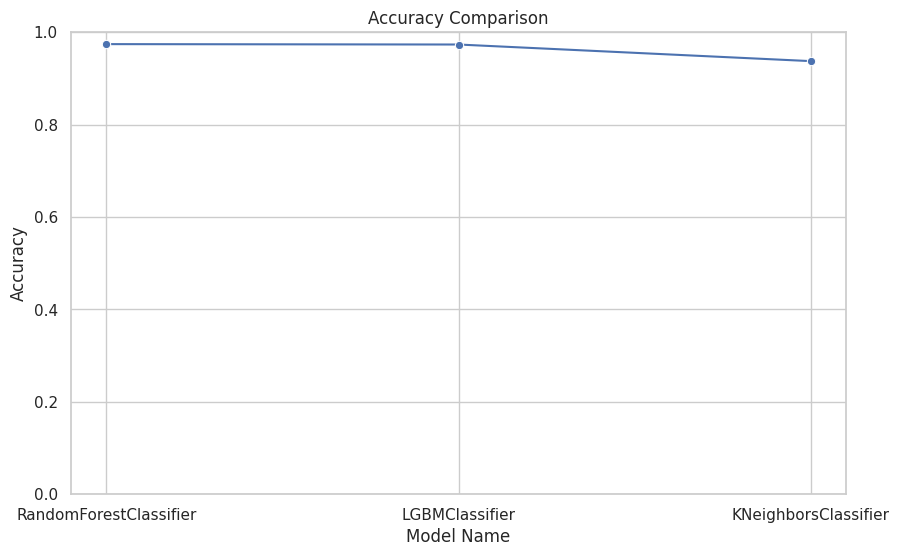

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Collect results from model evaluation
results = []

# Evaluate Random Forest
results.append(evaluate_model(rf_model, X_train, Y_train, X_test, Y_test))

# Evaluate LGBMClassifier
results.append(evaluate_model(lgbm_model, X_train, Y_train, X_test, Y_test))

# Evaluate K-Nearest Neighbors
results.append(evaluate_model(knn_model, X_train, Y_train, X_test, Y_test))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set up the plotting environment
sns.set(style="whitegrid")

# Plot Training Time as Line Graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='model_name', y='training_time', data=results_df, marker='o', palette="Blues_d")
plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')
plt.xlabel('Model Name')
plt.show()

# Plot Prediction Time as Line Graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='model_name', y='prediction_time', data=results_df, marker='o', palette="Greens_d")
plt.title('Prediction Time Comparison')
plt.ylabel('Time (seconds)')
plt.xlabel('Model Name')
plt.show()

# Plot Peak Memory Usage as Line Graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='model_name', y='peak_memory', data=results_df, marker='o', palette="Reds_d")
plt.title('Peak Memory Usage Comparison')
plt.ylabel('Memory (MB)')
plt.xlabel('Model Name')
plt.show()

# Plot Accuracy as Line Graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='model_name', y='accuracy', data=results_df, marker='o', palette="Purples_d")
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xlabel('Model Name')
plt.show()


In [ ]:
import numpy as np

# Function to identify the best model based on multiple criteria
def find_best_model(models, X_train, Y_train, X_test, Y_test, weights=None):
    if weights is None:
        weights = {'accuracy': 0.5, 'training_time': 0.2, 'prediction_time': 0.2, 'peak_memory': 0.1}

    best_model = None
    best_composite_score = -np.inf
    best_model_metrics = None

    for model in models:
        metrics = evaluate_model(model, X_train, Y_train, X_test, Y_test)

        # Normalize metrics (assuming lower training time, prediction time, and peak memory are better)
        normalized_accuracy = metrics['accuracy']  # Higher is better
        normalized_training_time = 1 / metrics['training_time']  # Lower is better
        normalized_prediction_time = 1 / metrics['prediction_time']  # Lower is better
        normalized_peak_memory = 1 / metrics['peak_memory']  # Lower is better

        # Calculate composite score based on weights
        composite_score = (
            weights['accuracy'] * normalized_accuracy +
            weights['training_time'] * normalized_training_time +
            weights['prediction_time'] * normalized_prediction_time +
            weights['peak_memory'] * normalized_peak_memory
        )

        if composite_score > best_composite_score:
            best_composite_score = composite_score
            best_model = model
            best_model_metrics = metrics

    # Print the best model's details
    print("Best Model:")
    print(f"Model Name: {best_model.__class__.__name__}")
    print(f"Training Time: {best_model_metrics['training_time']:.4f} seconds")
    print(f"Prediction Time: {best_model_metrics['prediction_time']:.4f} seconds")
    print(f"Peak Memory Usage: {best_model_metrics['peak_memory']:.2f} MB")
    print(f"Accuracy: {best_model_metrics['accuracy']:.4f}")
    print("Classification Report:\n", classification_report(Y_test, best_model.predict(X_test)))

    return best_model


In [ ]:
models = [RandomForestClassifier(random_state=42), LGBMClassifier(random_state=42, force_row_wise=True), KNeighborsClassifier()]
best_model = find_best_model(models, X_train, Y_train, X_test, Y_test)


Model: RandomForestClassifier
Training Time: 18.9733 seconds
Prediction Time: 0.6372 seconds
Peak Memory Usage: 17.03 MB
Accuracy: 0.9743

[LightGBM] [Info] Number of positive: 69893, number of negative: 69737
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 139630, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500559 -> initscore=0.002234
[LightGBM] [Info] Start training from score 0.002234
Model: LGBMClassifier
Training Time: 1.3831 seconds
Prediction Time: 0.1644 seconds
Peak Memory Usage: 19.01 MB
Accuracy: 0.9734

Model: KNeighborsClassifier
Training Time: 0.3007 seconds
Prediction Time: 2.7705 seconds
Peak Memory Usage: 17.88 MB
Accuracy: 0.9375

Best Model:
Model Name: LGBMClassifier
Training Time: 1.3831 seconds
Prediction Time: 0.1644 seconds
Peak Memory Usage: 19.01 MB
Accuracy: 0.9734
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.

# **NOW USING STREAMLIT**

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

In [ ]:
resampled_df.to_csv('resampled_data.csv', index=False)

In [ ]:
import streamlit as st
import pandas as pd

# Load the resampled data
resampled_df = pd.read_csv('resampled_data.csv')

# Display the first 5 rows of the resampled DataFrame
st.write("Preview of the Resampled Data:")
st.dataframe(resampled_df.head())

DeltaGenerator()

In [ ]:
%%writefile diabetes_predictor.py


Overwriting diabetes_predictor.py


In [ ]:
!npm install -g localtunnel


changed 22 packages, and audited 23 packages in 1s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!npm audit fix --force!

npm ERR! code ENOLOCK
npm ERR! audit This command requires an existing lockfile.
npm ERR! audit Try creating one first with: npm i --package-lock-only
npm ERR! audit Original error: loadVirtual requires existing shrinkwrap file

npm ERR! A complete log of this run can be found in:
npm ERR!     /root/.npm/_logs/2024-08-27T10_45_20_000Z-debug-0.log


In [ ]:
!streamlit run diabetes_predictor.py &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.159.177:8501

  Stopping...


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.106.159.177


In [ ]:
!npx localtunnel --port 8501

your url is: https://afraid-phones-buy.loca.lt
34.106.159.177
^C
